In [97]:
# import os
# x = os.listdir()

In [49]:
# from PIL import Image
# im = Image.open('..\data\dribble9.webp').convert('RGB')
# im.save('..\data\dribble9.jpg','jpeg')    

In [54]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [56]:
!pip install tensorflow

  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=b595e7c84a08fbc45527e644d3afc7e7f0f0331ee6ef9ef9ec9b5eaf2355817f
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:
!pip install tensorflow-datasets

  Using cached promise-2.3.tar.gz (19 kB)
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21502 sha256=4a52696dd0da60f1fa5838414646bd5223e7ffde2ee2eb6eb31b6aa8ec4b9775
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.0.0
    Uninstalling absl-py-1.0.0:
      Successfully uninstalled absl-py-1.0.0


In [60]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [61]:
print(tf.__version__)


2.7.0


In [100]:
batch_size = 32
img_height = 180
img_width = 180

In [104]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9 files belonging to 3 classes.
Using 8 files for training.


In [103]:
path = '../data/'

In [105]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 9 files belonging to 3 classes.
Using 1 files for validation.


In [106]:
class_names = train_ds.class_names
print(class_names)

['dailyActivity', 'dashboard', 'ecommerce']


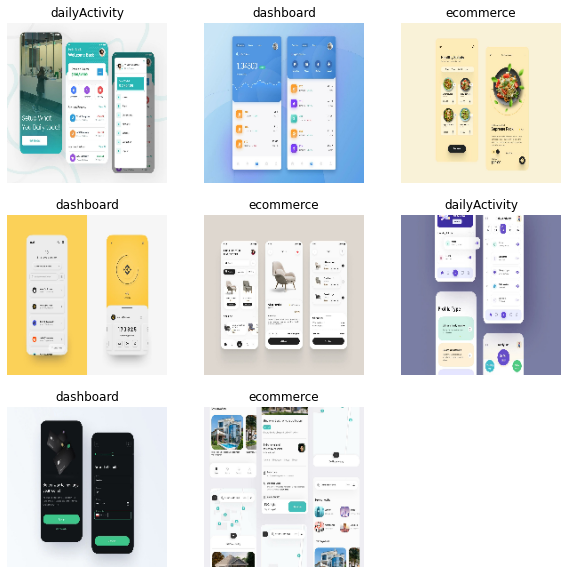

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [110]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(8, 180, 180, 3)
(8,)


In [111]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [112]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.10432115 1.0


In [113]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [114]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [115]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [116]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
1/1 [==============================] - 1s 1s/step - loss: 1.6650 - accuracy: 0.0000e+00 - val_loss: 1.2759 - val_accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 261ms/step - loss: 1.1650 - accuracy: 0.3750 - val_loss: 1.0101 - val_accuracy: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 264ms/step - loss: 1.0063 - accuracy: 0.5000 - val_loss: 0.9825 - val_accuracy: 1.0000


In [127]:
list_ds = tf.data.Dataset.list_files(str(path + '*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=True)


InvalidArgumentError: buffer_size must be greater than zero. [Op:ShuffleDatasetV3]

In [128]:
for f in list_ds.take(5):
    print(f.numpy())

b'..\\data\\dailyActivity\\dribble2.jpg'
b'..\\data\\dailyActivity\\dribble3.jpg'
b'..\\data\\dashboard\\dribble4.jpg'
b'..\\data\\dashboard\\dribble6.jpg'
b'..\\data\\dashboard\\dribble7.jpg'


In [121]:
# import glob
# filenames = glob.glob(path)

In [122]:
# print(filenames)

['../data/']


In [130]:
class_names = np.array(sorted([item.name for item in path.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

AttributeError: 'list' object has no attribute 'glob'

In [131]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [132]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

9
0


In [133]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [134]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])


In [135]:
def process_path(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label


In [136]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [137]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())


Image shape:  (180, 180, 3)
Label:  0


In [138]:
def configure_for_performance(ds):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)


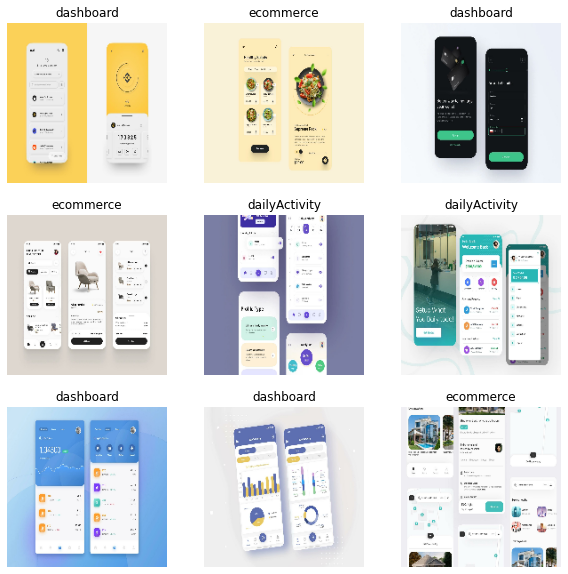

In [139]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    plt.title(class_names[label])
    plt.axis("off")


In [140]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)


Epoch 1/3
1/1 [==============================] - 1s 560ms/step - loss: 0.8786 - accuracy: 0.8889
Epoch 2/3
1/1 [==============================] - 0s 272ms/step - loss: 0.7447 - accuracy: 0.6667
Epoch 3/3
1/1 [==============================] - 0s 268ms/step - loss: 0.6739 - accuracy: 0.5556


In [142]:
# (train_ds, val_ds, test_ds), metadata = tfds.load(
#     'data',
#     split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
#     with_info=True,
#     as_supervised=True,
# )

In [143]:
# num_classes = metadata.features['label'].num_classes
# print(num_classes)

NameError: name 'metadata' is not defined

In [144]:
train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
test_ds = configure_for_performance(test_ds)

NameError: name 'test_ds' is not defined

In [145]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [146]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0
